In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from model import Net, train_model, test_model
from utils import plot_data, plot_loss_accuracy

In [5]:
# Device configuration -use CUDA tensor types if available
cuda = torch.cuda.is_available()
device = 'cuda' if cuda else 'cpu'
print("CUDA Available?", cuda)

CUDA Available? False


In [6]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1), #crop & resize 10 percentage of images -> to remove bias
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),   #convert image to PyTorch tensor
    transforms.Normalize((0.1307,), (0.3081,)), #normalize test with  mean=0.1307 & standard deviation 0.3081
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)) #apply the same normalization of train set to test set
    ])

In [7]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms) #loads train-images-idx3-ubyte: training set images
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)  #loads t10k-images-idx3-ubyte

100%|██████████| 9912422/9912422 [00:00<00:00, 104980421.44it/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 26368239.84it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 34722339.41it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 17989167.86it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



In [8]:
batch_size = 256

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

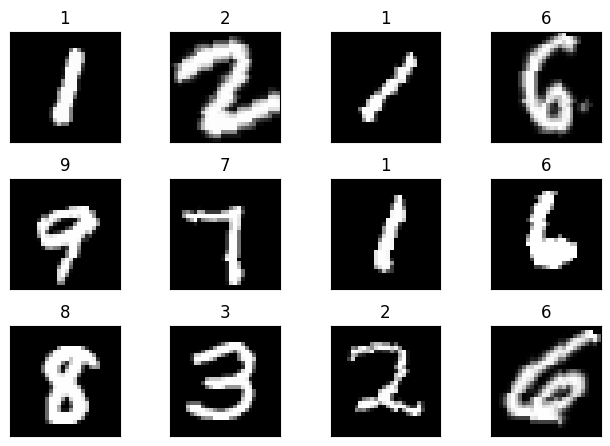

In [9]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader)) 

plot_data(batch_data, batch_label, 12, 3, 4)

In [10]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_accuracy = []
test_accuracy = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

In [11]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
#Negative log likelihood loss function is used to classify 10 classes [0-9 digits]
criterion = nn.NLLLoss()
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train_acc, train_loss = train_model(model, device, train_loader, optimizer, criterion)
  train_accuracy.append(train_acc)
  train_losses.append(train_loss)
  test_acc, test_loss = test_model(model, device, test_loader, criterion)
  test_accuracy.append(test_acc)
  test_losses.append(test_loss)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.1625 Batch_id=234 Accuracy=87.01: 100%|██████████| 235/235 [01:24<00:00,  2.77it/s]


Test set: Average loss: 0.0003, Accuracy: 9779/10000 (97.79%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.0661 Batch_id=234 Accuracy=97.02: 100%|██████████| 235/235 [01:25<00:00,  2.75it/s]


Test set: Average loss: 0.0002, Accuracy: 9868/10000 (98.68%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.0625 Batch_id=234 Accuracy=97.61: 100%|██████████| 235/235 [01:25<00:00,  2.75it/s]


Test set: Average loss: 0.0002, Accuracy: 9887/10000 (98.87%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0555 Batch_id=234 Accuracy=98.02: 100%|██████████| 235/235 [01:29<00:00,  2.61it/s]


Test set: Average loss: 0.0001, Accuracy: 9892/10000 (98.92%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0401 Batch_id=234 Accuracy=98.22: 100%|██████████| 235/235 [01:26<00:00,  2.73it/s]


Test set: Average loss: 0.0001, Accuracy: 9906/10000 (99.06%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0185 Batch_id=234 Accuracy=98.33: 100%|██████████| 235/235 [01:25<00:00,  2.74it/s]


Test set: Average loss: 0.0001, Accuracy: 9922/10000 (99.22%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0738 Batch_id=234 Accuracy=98.47: 100%|██████████| 235/235 [01:25<00:00,  2.74it/s]


Test set: Average loss: 0.0001, Accuracy: 9916/10000 (99.16%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0986 Batch_id=234 Accuracy=98.50: 100%|██████████| 235/235 [01:23<00:00,  2.81it/s]


Test set: Average loss: 0.0001, Accuracy: 9916/10000 (99.16%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0440 Batch_id=234 Accuracy=98.59: 100%|██████████| 235/235 [01:25<00:00,  2.75it/s]


Test set: Average loss: 0.0001, Accuracy: 9917/10000 (99.17%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0337 Batch_id=234 Accuracy=98.66: 100%|██████████| 235/235 [01:26<00:00,  2.71it/s]


Test set: Average loss: 0.0001, Accuracy: 9923/10000 (99.23%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0378 Batch_id=234 Accuracy=98.69: 100%|██████████| 235/235 [01:26<00:00,  2.72it/s]


Test set: Average loss: 0.0001, Accuracy: 9921/10000 (99.21%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0267 Batch_id=234 Accuracy=98.76: 100%|██████████| 235/235 [01:26<00:00,  2.72it/s]


Test set: Average loss: 0.0001, Accuracy: 9913/10000 (99.13%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0419 Batch_id=234 Accuracy=98.72: 100%|██████████| 235/235 [01:27<00:00,  2.69it/s]


Test set: Average loss: 0.0001, Accuracy: 9912/10000 (99.12%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0028 Batch_id=234 Accuracy=98.86: 100%|██████████| 235/235 [01:26<00:00,  2.73it/s]


Test set: Average loss: 0.0001, Accuracy: 9924/10000 (99.24%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0163 Batch_id=234 Accuracy=98.86: 100%|██████████| 235/235 [01:25<00:00,  2.75it/s]


Test set: Average loss: 0.0001, Accuracy: 9924/10000 (99.24%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.1031 Batch_id=234 Accuracy=99.05: 100%|██████████| 235/235 [01:26<00:00,  2.72it/s]


Test set: Average loss: 0.0001, Accuracy: 9948/10000 (99.48%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0109 Batch_id=234 Accuracy=99.03: 100%|██████████| 235/235 [01:26<00:00,  2.72it/s]


Test set: Average loss: 0.0001, Accuracy: 9949/10000 (99.49%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0133 Batch_id=234 Accuracy=99.08: 100%|██████████| 235/235 [01:25<00:00,  2.75it/s]


Test set: Average loss: 0.0001, Accuracy: 9944/10000 (99.44%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0129 Batch_id=234 Accuracy=99.15: 100%|██████████| 235/235 [01:26<00:00,  2.72it/s]


Test set: Average loss: 0.0001, Accuracy: 9945/10000 (99.45%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0031 Batch_id=234 Accuracy=99.12: 100%|██████████| 235/235 [01:26<00:00,  2.72it/s]


Test set: Average loss: 0.0001, Accuracy: 9944/10000 (99.44%)

Adjusting learning rate of group 0 to 1.0000e-03.


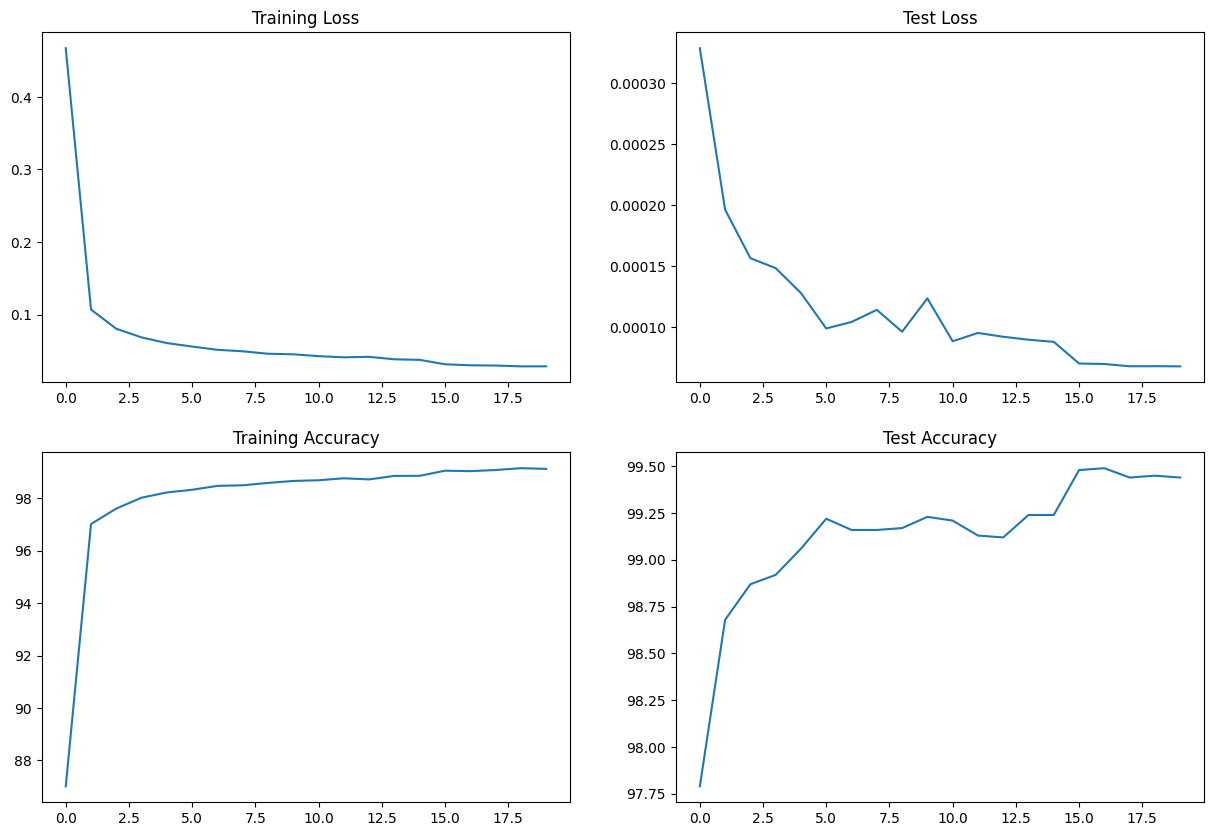

In [13]:
plot_loss_accuracy(train_losses, test_losses, train_accuracy, test_accuracy)

In [14]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
       BatchNorm2d-3            [-1, 8, 26, 26]              16
            Conv2d-4           [-1, 16, 24, 24]           1,152
              ReLU-5           [-1, 16, 24, 24]               0
       BatchNorm2d-6           [-1, 16, 24, 24]              32
            Conv2d-7           [-1, 16, 22, 22]           2,304
              ReLU-8           [-1, 16, 22, 22]               0
       BatchNorm2d-9           [-1, 16, 22, 22]              32
           Conv2d-10           [-1, 32, 20, 20]           4,608
             ReLU-11           [-1, 32, 20, 20]               0
      BatchNorm2d-12           [-1, 32, 20, 20]              64
    